<a href="https://colab.research.google.com/github/Andyqballer/HomeWork5/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values in the dataset: price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
mainroad_yes                       0
guestroom_yes                      0
basement_yes                       0
hotwaterheating_yes                0
airconditioning_yes                0
prefarea_yes                       0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64

Training with learning rate: 0.1
Epoch 500, Loss: 0.6769
Final loss with learning rate 0.1: 0.6769

Training with learning rate: 0.01
Epoch 500, Loss: 0.6769
Final loss with learning rate 0.01: 0.6769

Training with learning rate: 0.001
Epoch 500, Loss: 0.6799
Final loss with learning rate 0.001: 0.6799

Training with learning rate: 0.0001
Epoch 500, Loss: 1.2425
Final loss with learning rate 0.0001: 1.2425


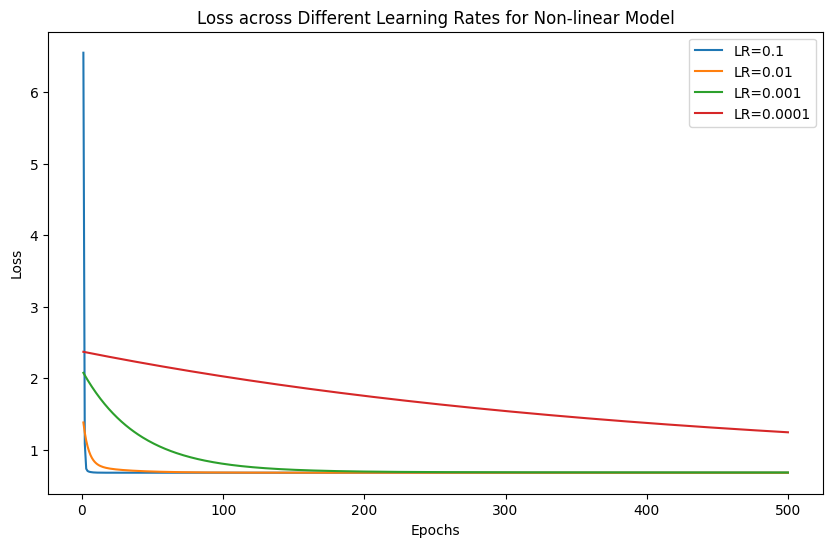


Training linear model with learning rate: 0.1
Epoch 500, Train Loss: 0.3866, Validation Loss: 0.6565
Epoch 1000, Train Loss: 0.3866, Validation Loss: 0.6565
Epoch 1500, Train Loss: 0.3866, Validation Loss: 0.6565
Epoch 2000, Train Loss: 0.3866, Validation Loss: 0.6565
Epoch 2500, Train Loss: 0.3866, Validation Loss: 0.6565
Epoch 3000, Train Loss: 0.3866, Validation Loss: 0.6565
Epoch 3500, Train Loss: 0.3866, Validation Loss: 0.6565
Epoch 4000, Train Loss: 0.3866, Validation Loss: 0.6565
Epoch 4500, Train Loss: 0.3866, Validation Loss: 0.6565
Epoch 5000, Train Loss: 0.3866, Validation Loss: 0.6565
Final Validation R-squared for learning rate 0.1: 0.5464

Training linear model with learning rate: 0.01
Epoch 500, Train Loss: 0.3866, Validation Loss: 0.6565
Epoch 1000, Train Loss: 0.3866, Validation Loss: 0.6565
Epoch 1500, Train Loss: 0.3866, Validation Loss: 0.6565
Epoch 2000, Train Loss: 0.3866, Validation Loss: 0.6565
Epoch 2500, Train Loss: 0.3866, Validation Loss: 0.6565
Epoch 3000

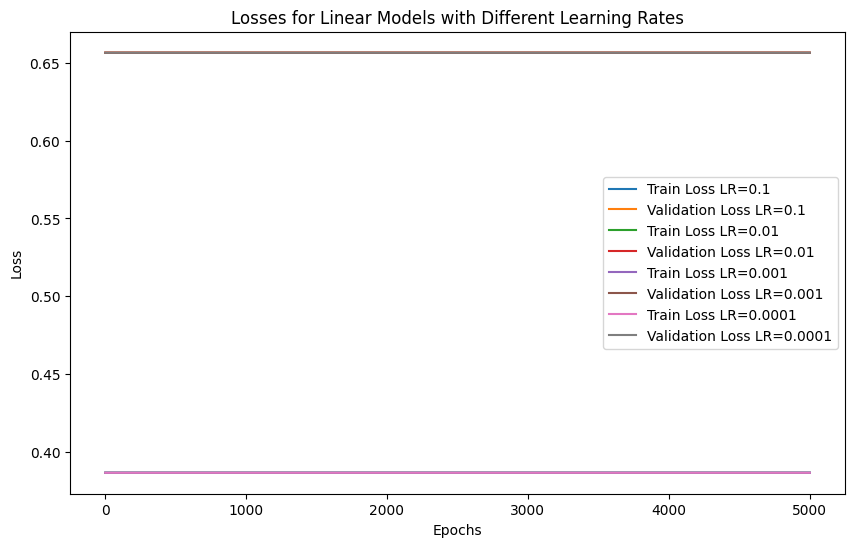

Epoch 500, Train Loss: 0.2773, Validation Loss: 0.5024
Epoch 1000, Train Loss: 0.2773, Validation Loss: 0.5024
Epoch 1500, Train Loss: 0.2773, Validation Loss: 0.5024
Epoch 2000, Train Loss: 0.2773, Validation Loss: 0.5024
Epoch 2500, Train Loss: 0.2773, Validation Loss: 0.5024
Epoch 3000, Train Loss: 0.2773, Validation Loss: 0.5024
Epoch 3500, Train Loss: 0.2773, Validation Loss: 0.5024
Epoch 4000, Train Loss: 0.2773, Validation Loss: 0.5024
Epoch 4500, Train Loss: 0.2773, Validation Loss: 0.5024
Epoch 5000, Train Loss: 0.2773, Validation Loss: 0.5024
Problem 3 linear regression R-squared: 0.6529


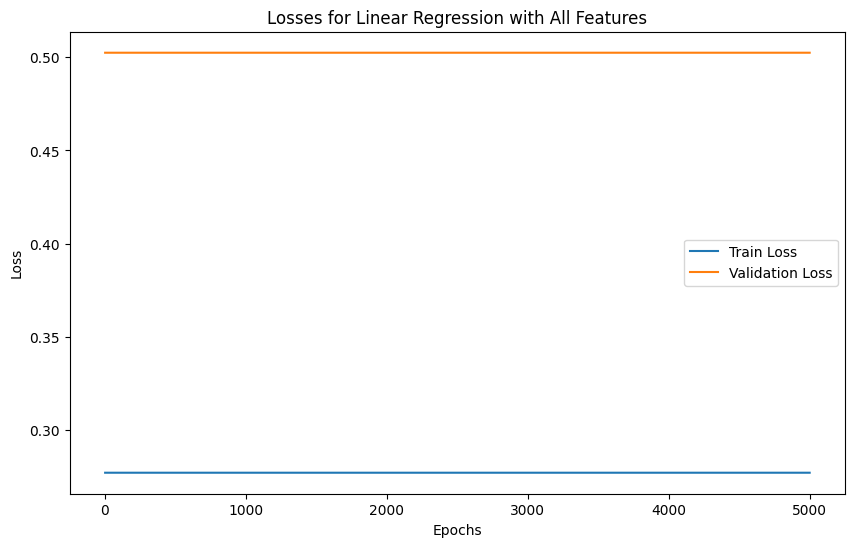

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Load and Preprocess the Housing Dataset
df = pd.read_csv('housing.csv')

# Handle categorical variables using One-Hot Encoding
df = pd.get_dummies(df, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                                 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)

# Check for missing values and handle them (if any)
print("Missing values in the dataset:", df.isnull().sum())
df = df.dropna()  # Drop rows with missing values, can also impute if needed

# Apply standard scaling to all numerical features
scaler = StandardScaler()
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# -------------------------------------------
# 2. Problem 1: Non-linear Model for Temperature Prediction
# -------------------------------------------

# Non-linear model function
def non_linear_model(X, w2, w1, b):
    return w2 * X ** 2 + w1 * X + b

# Train non-linear model using gradient descent
def train_non_linear_model(X, y, learning_rate, epochs):
    w2 = np.random.rand()
    w1 = np.random.rand()
    b = np.random.rand()

    losses = []  # Store loss history
    for epoch in range(epochs):
        y_pred = non_linear_model(X, w2, w1, b)
        loss = np.mean((y_pred - y) ** 2)

        # Append the loss for every epoch
        losses.append(loss)

        # Compute gradients
        dw2 = np.mean(2 * (y_pred - y) * X ** 2)
        dw1 = np.mean(2 * (y_pred - y) * X)
        db = np.mean(2 * (y_pred - y))

        # Update parameters using gradient descent
        w2 -= learning_rate * dw2
        w1 -= learning_rate * dw1
        b -= learning_rate * db

        # Print progress every 500 epochs
        if (epoch + 1) % 500 == 0:
            print(f"Epoch {epoch + 1}, Loss: {loss:.4f}")

    return w2, w1, b, losses  # Return parameters and loss history

# Training with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
losses = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    w2, w1, b, loss_history = train_non_linear_model(df['area'], df['price'], lr, 500)
    losses[lr] = loss_history
    final_loss = loss_history[-1]
    print(f"Final loss with learning rate {lr}: {final_loss:.4f}")

# Plot loss across different learning rates
plt.figure(figsize=(10, 6))
for lr, loss_history in losses.items():
    plt.plot(range(1, len(loss_history) + 1), loss_history, label=f"LR={lr}")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss across Different Learning Rates for Non-linear Model')
plt.legend()
plt.show()

# -------------------------------------------
# 3. Problem 2: Linear Regression for Housing Price (using selected features)
# -------------------------------------------

# Select relevant features and target variable
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = df['price']

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train linear regression model using sklearn
def train_linear_model(X_train, y_train, X_val, y_val, learning_rate, epochs):
    model = LinearRegression()
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.fit(X_train, y_train)
        train_loss = np.mean((model.predict(X_train) - y_train) ** 2)
        val_loss = np.mean((model.predict(X_val) - y_val) ** 2)

        # Append losses
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        # Print progress every 500 epochs
        if (epoch + 1) % 500 == 0:
            print(f"Epoch {epoch + 1}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    return model, train_losses, val_losses

# Explore different learning rates for linear model
learning_rates_linear = [0.1, 0.01, 0.001, 0.0001]
linear_losses = {}

for lr in learning_rates_linear:
    print(f"\nTraining linear model with learning rate: {lr}")
    model, train_losses, val_losses = train_linear_model(X_train, y_train, X_val, y_val, lr, 5000)
    linear_losses[lr] = (train_losses, val_losses)
    print(f"Final Validation R-squared for learning rate {lr}: {model.score(X_val, y_val):.4f}")

# Plot loss for linear models
plt.figure(figsize=(10, 6))
for lr, (train_losses, val_losses) in linear_losses.items():
    plt.plot(range(1, len(train_losses) + 1), train_losses, label=f"Train Loss LR={lr}")
    plt.plot(range(1, len(val_losses) + 1), val_losses, label=f"Validation Loss LR={lr}")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Losses for Linear Models with Different Learning Rates')
plt.legend()
plt.show()

# -------------------------------------------
# 4. Problem 3: Linear Regression for Housing Price (using all features)
# -------------------------------------------

# Use all available features in the dataset for training
X_all = df.drop('price', axis=1)  # All columns except 'price'
y_all = df['price']

# Scale the features
X_all_scaled = scaler.fit_transform(X_all)

# Split data into training and validation sets (80% training, 20% validation)
X_train_all, X_val_all, y_train_all, y_val_all = train_test_split(X_all_scaled, y_all, test_size=0.2, random_state=42)

# Train linear regression model with all features
model_all_features, train_losses_all, val_losses_all = train_linear_model(X_train_all, y_train_all, X_val_all, y_val_all, 0.0001, 5000)
print(f"Problem 3 linear regression R-squared: {model_all_features.score(X_val_all, y_val_all):.4f}")

# Plotting losses for all features
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses_all) + 1), train_losses_all, label="Train Loss")
plt.plot(range(1, len(val_losses_all) + 1), val_losses_all, label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Losses for Linear Regression with All Features')
plt.legend()
plt.show()
